In [1]:
import pandas as pd
import numpy as np
import math
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

In [2]:
# Load the dataset
dataset = pd.read_csv("creditcard.csv")

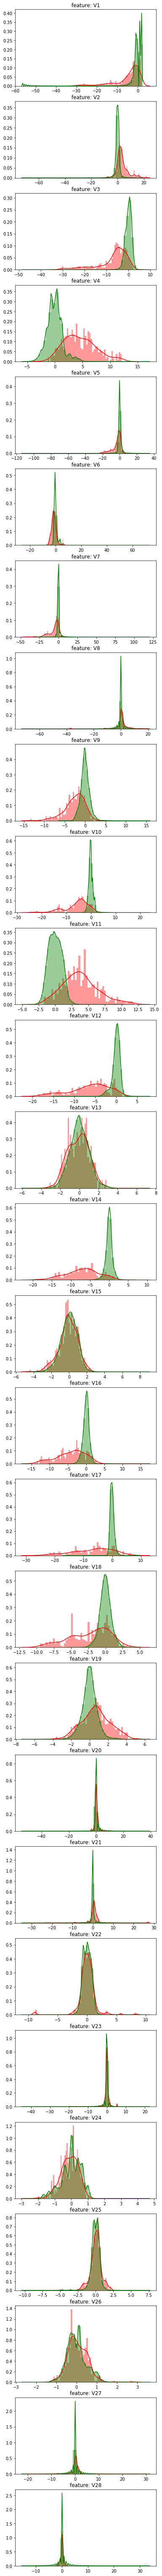

In [3]:
# Plot continuous features V1, V2, ... V28
gs = gridspec.GridSpec(28, 1)
plt.figure(figsize=(6,28*4))
for i, col in enumerate(dataset[dataset.iloc[:,1:29].columns]):
    ax5 = plt.subplot(gs[i])
    sns.distplot(dataset[col][dataset.Class == 1], bins=50, color='r')
    sns.distplot(dataset[col][dataset.Class == 0], bins=50, color='g')
    ax5.set_xlabel('')
    ax5.set_title('feature: ' + str(col))
plt.show()

In [4]:
# Create separate datasets for continuous features and discrete features
data_conti = dataset.copy()
data_discrete = dataset.copy()

data_conti.drop(labels = ["Amount","Time"], axis = 1, inplace = True)
data_discrete.drop(labels = ["V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "V10", "V11", "V12", "V13", "V14", "V15", "V16", "V17", "V18", "V19", "V20", "V21", "V22", "V23", "V24", "V25", "V26", "V27", "V28"], axis = 1, inplace = True)

print("\nDataset for continuous features:\n", data_conti.columns)
print("\nDataset for discrete features:\n", data_discrete.columns)


Dataset for continuous features:
 Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class'],
      dtype='object')

Dataset for discrete features:
 Index(['Time', 'Amount', 'Class'], dtype='object')


In [5]:
print("Fraud cases in dataset: ", sum(dataset["Class"]))

Fraud cases in dataset:  492


In [6]:
# Split the training data with continuous features into Class 1 (Fraud) and Class 0 (Otherwise)
data_conti_c1 = data_conti[data_conti["Class"] == 1]
data_conti_c0 = data_conti[data_conti["Class"] == 0]

print(data_conti_c1.shape)
print(data_conti_c0.shape)

(492, 29)
(284315, 29)


In [7]:
# Calculate mu (mean)
def mean(numbers):
    return sum(numbers)/float(len(numbers))

#Calculate sigma (standard deviation)
def stdev(numbers):
    avg = mean(numbers)
    variance = sum([pow(x-avg,2) for x in numbers])/float(len(numbers)-1)
    return math.sqrt(variance)

# Calculate Gaussian Probability Density Function
def calculateProbability(x, mean, stdev):
    exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
    return (1 / (math.sqrt(2*math.pi) * stdev)) * exponent

In [8]:
# Calculate Probability Density Function (PDF) for each feature V1 to V28 for each Class
def calculatePdfContinuous(data_conti):
    pdf_feature = {};
    for i in range(1,29):    
        feature = 'V'
        feature += str(i)
        prob_array = [];
        for input in data_conti[feature]:
            mu = mean(data_conti[feature])
            sigma = stdev(data_conti[feature])
            prob_input = calculateProbability(input, mu, sigma) 
            prob_array.append(prob_input)
        pdf_feature[feature] = prob_array
    return pdf_feature

In [9]:
# Calculate Probability Density Function (PDF) for each feature V1 to V28 for Class 0
#pdf_feature_class0 = calculatePdfContinuous(data_conti_c0)

# Calculate Probability Density Function (PDF) for each feature V1 to V28 for Class 1
pdf_feature_class1 = calculatePdfContinuous(data_conti_c1)

In [10]:
# Divide the entire dataset into input features (X) and target output (y)
X = dataset.drop(['Class'], axis=1).values
y = dataset['Class'].values

# Split data into training set (80%) and test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set size: ", len(y_train), "\nTest set size: ", len(y_test))
print("Fraud cases in test set: ", sum(y_test))

# create a Naive Bayes Classifier
classifier = GaussianNB()
    
# fit it to training data
classifier.fit(X_train, y_train)
    
# predict using test data
y_pred = classifier.predict(X_test)
    
# Compute predicted probabilities
y_pred_prob = classifier.predict_proba(X_test)
    
# Calculate and print precision, recall, F-score and accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
fscore = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test,y_pred)
    
print("Precision: ", precision)
print("Recall: ", recall)
print("F-score: ", fscore)
print("accuracy score: ", accuracy )

Training set size:  227845 
Test set size:  56962
Fraud cases in test set:  98
Precision:  0.13771186440677965
Recall:  0.6632653061224489
F-score:  0.2280701754385965
accuracy score:  0.9922755521224677
